# Practicals for lecture 2.2

Download this practicals file on your computer and fill it out using your local Python installation!

## 2.2.0 Opening images and imaging data

#### Simple images

In [4]:
# Install with conda/pip the Pillow library (try "conda install -c conda-forge Pillow", otherwise use pip). 
# Then, choose an image on you computer and load it using PIL!

from PIL import Image
img = Image.open("/Users/vigji/code/python-cimec/lectures/files/octopus.jpg")

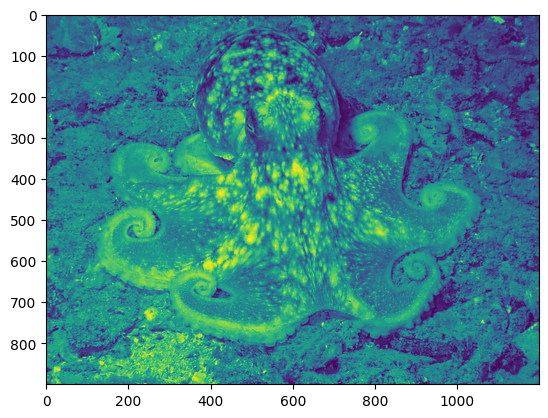

In [6]:
import numpy as np
from matplotlib import pyplot as plt
# Convert the image to a numpy array and plot just the green channel:
img_arr = np.array(img)

plt.figure()
plt.imshow(img_arr[:, :, 1])

#### Imaging data

In [4]:
# Here we will be using the nifti library to deal with real imaging data.
# The following exercises use the data we downloaded last time from GitHub! 
# (imaging files are the files with extension .nii.gz)


In [9]:
import nibabel
# conda/pip install the nibabel library (try "conda install -c conda-forge nibabel", if it does not work use pip)

# Then, open any of the imaging files from the imagig-dataset using the nibabel.load function

data = nibabel.load("/Users/vigji/exercise_data/sub-001/ses-1/anat/sub-001_ses-1_acq-RARE_T2w.nii.gz")

# What is the type of the object you get from the function?
type(data)


nibabel.nifti1.Nifti1Image

In [11]:
# You can look at the image metadata by printing the img.header attribute.
# Check that out!

print(data.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 120 120  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.   0.16 0.16 0.16 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 1.0
quatern_c       : -0.0
quatern_d       : 0.0
qoffset_x       : -9.6
qoffset_y       : 8.33494
qoffset_z       : 6.16964
srow_x          : [ 0.16 -0.  

In [13]:
# If we want to see the raw imaging data as a numpy array, we can use the 
# get_fdata() method of the image object. Try it out!
# - What is the shape of your image?
# - What is the bit depth of your data?

data_array = data.get_fdata()
data_array.shape

(120, 120, 48)

In [14]:
data_array.dtype

dtype('float64')

Text(0, 0.5, 'Left-right axis')

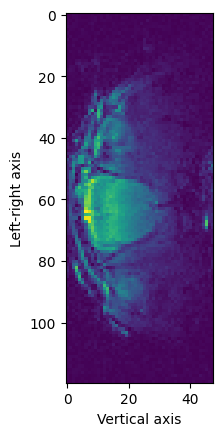

In [16]:
# The volume data is 3D:
# - The first dimension is the (left, right) axis
# - the second dimension is the (anterior, posterior) axis
# the third dimension is the (superior, inferior) axis.

# Use indexing on the volume to obtain a coronal section
# (a coronal section is a slice over the antero-posterior axis).
# Then plot it using plt.imshow, and write in the plot the axes names!
plt.figure()
plt.imshow(data_array[:, 35, :])
plt.xlabel("Vertical axis")
plt.ylabel("Left-right axis")


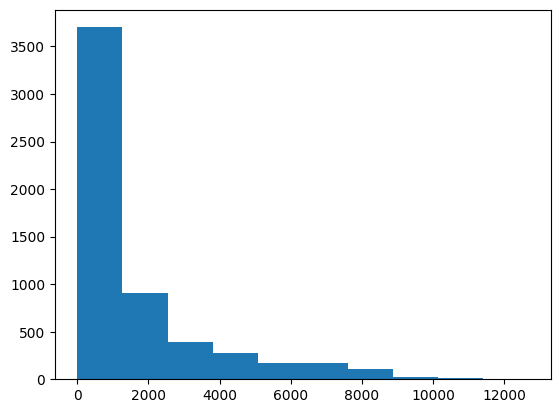

In [18]:
# Show the histogram of the slice data:
plt.figure()
plt.hist(data_array[:, 35, :].flatten())
plt.show()

In [21]:
sl_idx

0

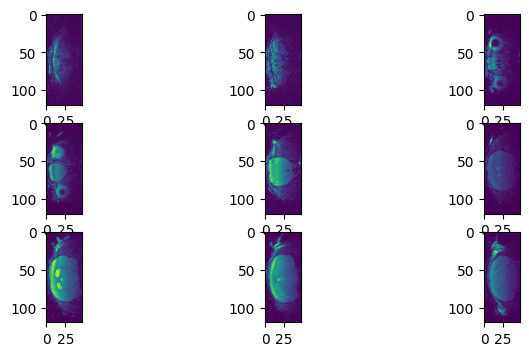

In [22]:
# Use subplots and a for loop to display in the same image multiple
# slices from the data:

f, axs = plt.subplots(3, 3, figsize=(8, 4))

for ax, sl_idx in zip(axs.flatten(), range(0, 90, 10)):
    ax.imshow(data_array[:, sl_idx, :])

In [ ]:
# (Further reading)
# If you want to know more about nibabel, you can check the documentation 
# to open nifti files at https://nipy.org/nibabel/gettingstarted.html
# (Optional but recommended if you will use it in the future) 

# (Also optional... if you got guts) check the actual nifti header
# specification at https://nifti.nimh.nih.gov/pub/dist/src/niftilib/nifti1.h

## 2.2.1 Generating images programmatically

In [13]:
# For an experiment, we need to generate images with certain features, one for every trial of the experiment.

# The images consist of either a circle or a square of a certain size and color, placed at a given height
# in the image. The features of the image for every trial are defined in a file we are given. Let's prepare
# this experiment!

# 1. The trial file is an excel file (God, who would ever do such thing?) that you can find on GitHub
#    in the practicals/data folder.
#    To load Excel files in pandas, we can use the openpyxl library. Pip-install the library,
#    and load into a DataFrame the trial structure defined in visual-task-trials.xlsx
#    using the pd.read_excel() function.


In [ ]:
# 2. Consider only the first trial. Use PIL to generate an image of size (300, 400) with the proper 
#    shape for that trial! Then, find a way to save images from PIL.


In [ ]:
# 4. Organize the code above as a function that takes as input the image features and a filename and creates
#    and saves the image (no returned value is necessary as the output is the written file)


In [ ]:
# 3. Use the pathlib library to create somewhere on your computer a new trial-imgs folder.
#    Then, iterate over the trials DataFrame, and use the function you wrote above to create all the necessary
#    images!
